# 캘리포니아 집값 예측

## 패키지 로딩

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로드 및 확인

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [43]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df.head())

x = df.drop(['Latitude','Longitude'], axis=1)
y = data.target

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 데이터 스케일링

In [4]:
scaled_data = StandardScaler().fit_transform(x)    # 평가 데이터에는 fit 하지 않고 transform만
scaled_data_df = pd.DataFrame(scaled_data, columns=data.feature_names[:6])
display(scaled_data_df.head())
print(scaled_data_df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   6.609700e-17  5.508083e-18  6.609700e-17 -1.060306e-16 -1.101617e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

           AveOccup  
count  2.064000e+04  
mean   3.442552e-18  
std    1.000024e+00  
min   -2.290000e-01  
25%   -6.171062e-02  
50%   -2.431585e-02  
75%    2.037453e-02  
max    1.194191e+02  


## 변수간 상관관계 시각화

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000


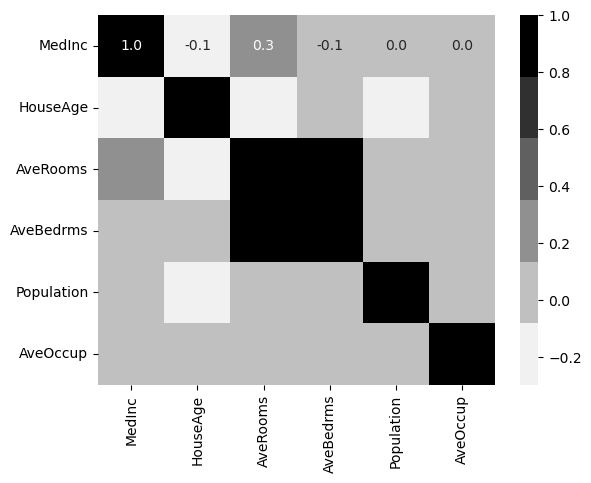

In [5]:
corr = scaled_data_df.corr()  # 변수간 상관관계 값 산출
print(corr)
cmap = sns.light_palette('black')
sns.heatmap(corr, annot=True, fmt='3.1f', cmap=cmap)
plt.show()

## 학습/평가 데이터 분할

### 표준화된 데이터 분할

In [6]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=10)

### 표준화하지 않은 데이터 분할

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

## 희귀모델 생성 및 학습

In [8]:
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

## 모델 예측 및 검증

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_hat = model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
print(f'MSE:{mse:.3f}')
print(f'RMSE:{np.sqrt(mse):.3f}')
print(f'결정계수:{r2_score(y_test, y_hat):.3f}')

MSE:0.634
RMSE:0.796
결정계수:0.532


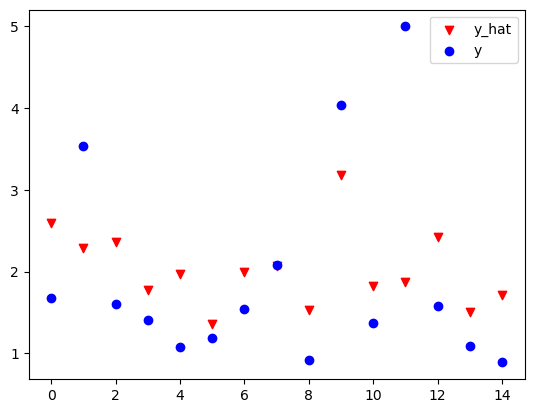

In [10]:
plt.scatter(np.arange(15), y_hat[:15], marker='v', color='r', label='y_hat')
plt.scatter(np.arange(15), y_test[:15], marker='o', color='b', label='y')
plt.legend()
plt.show()

In [11]:
weight = { f:w for f, w in zip(x.columns, model.coef_) }
print('추정계수(가중치)')
print(pd.Series(weight).sort_values(ascending=False))

추정계수(가중치)
AveBedrms     1.103587
MedInc        0.542363
HouseAge      0.016855
Population    0.000027
AveOccup     -0.005831
AveRooms     -0.216814
dtype: float64


# 학습곡선 시각화

In [12]:
# 학습 데이터의 크기 변화에 따른 학습과 평가의 오차변화 시각화
from sklearn.metrics import mean_squared_error

def plot_learning_curve(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
    train_error = []
    test_error = []
    for n in range(1, len(x)+1):                 # 데이터 1개부터 양 늘리며 예측 시작
        model.fit(x_train[:n], y_train[:n]) 
        y_train_hat = model.predict(x_train[:n])  # 학습 때 사용한 y train의 예측 값  -> 오차 적음
        y_test_hat = model.predict(x_test[:n])   # 한 번도 사용하지 않은 y test의 예측 값  -> 오차 큼 (해 보지 않음)
        train_error.append(mean_squared_error(y_train[:n], y_train_hat))   # 정답(y_train[:n])과 예측값
        test_error.append(mean_squared_error(y_test[:n], y_test_hat))  # 정답(y_test[:n])과 예측값

    plt.plot(np.sqrt(train_error), 'r', label='train')   # RMSE 만들기 위해 sqrt 사용 , () 안의 값 = y 값
    plt.plot(np.sqrt(test_error), 'b', label='test')  # x 값 생략되어 하나씩 증가하는 값이 x가 됨
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.show()

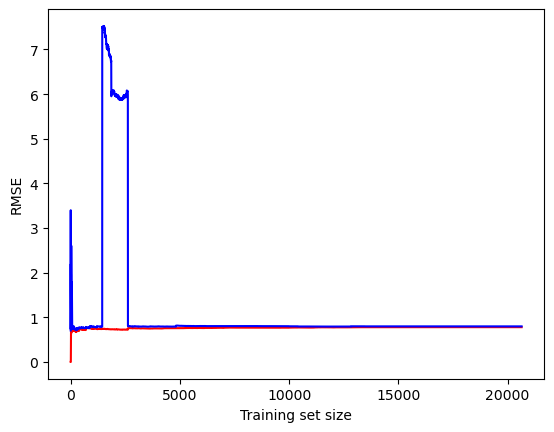

In [14]:
model = LinearRegression()
plot_learning_curve(model, x, y)

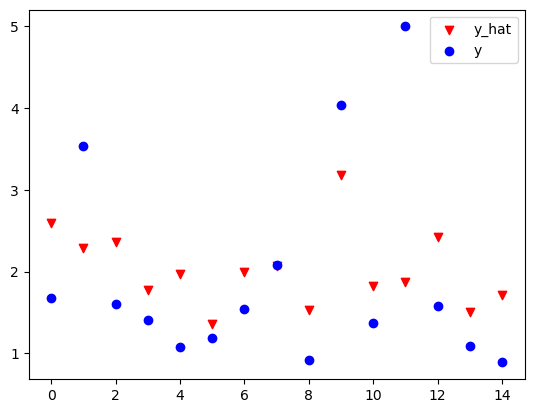

In [13]:
plt.scatter(np.arange(15), y_hat[:15], marker='v', color='r', label='y_hat')
plt.scatter(np.arange(15), y_test[:15], marker='o', color='b', label='y')
plt.legend()
plt.show()

# 다중공선성 및 변수선택 후 학습
- VIF 값 확인 (분산팽창지수)

In [16]:
!pip install statsmodels

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x, i)  for i in range(x.shape[1])]
vif['features'] = x.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
print(vif)

   VIF Factor    features
0    1.094793    AveOccup
1    2.322315  Population
2    4.309941    HouseAge
3    7.766787      MedInc
4   34.118257   AveBedrms
5   41.111592    AveRooms


In [18]:
# 분산팽창지수가 높은 변수 삭제
x = x.drop('AveBedrms', axis=1)

In [21]:
scaled_data = StandardScaler().fit_transform(x)  # 원 데이터 표준화
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=10)  # 데이터 스케일링

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
r_square = model.score(x_test, y_test)
print(f'결정계수:{r_square:.2f}')

결정계수:0.52


# [문제] 강남역 전철 출근 시간(07-08시) 승하차 인원 예측
- 패키지 로딩
- 데이터 로딩 및 확인
- 데이터 전처리
>- 'Date' 컬럼 삭제
>- 'Type' 컬럼 인코딩 (범주형 데이터 변환)
>- 'DoW': 컬럼 인코딩
- 독립변수와 종속변수 분리 (종속변수 = 출근 시간 승하차 인원)
- 학습 데이터, 평가 데이터 분리
- 모델 생성 및 예측
- 모델 평가 (R2, MSE, RMSE)

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 로딩 및 확인

In [52]:
df = pd.read_csv('GangnamTrainData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     610 non-null    object
 1   Type     610 non-null    object
 2   DoW      610 non-null    object
 3   05 ~ 06  610 non-null    int64 
 4   06 ~ 07  610 non-null    int64 
 5   07 ~ 08  610 non-null    int64 
 6   08 ~ 09  610 non-null    int64 
 7   09 ~ 10  610 non-null    int64 
 8   10 ~ 11  610 non-null    int64 
 9   11 ~ 12  610 non-null    int64 
 10  12 ~ 13  610 non-null    int64 
 11  13 ~ 14  610 non-null    int64 
 12  14 ~ 15  610 non-null    int64 
 13  15 ~ 16  610 non-null    int64 
 14  16 ~ 17  610 non-null    int64 
 15  17 ~ 18  610 non-null    int64 
 16  18 ~ 19  610 non-null    int64 
 17  19 ~ 20  610 non-null    int64 
 18  20 ~ 21  610 non-null    int64 
 19  21 ~ 22  610 non-null    int64 
 20  22 ~ 23  610 non-null    int64 
 21  23 ~ 24  610 non-null    int64 
 22  00

In [53]:
display(df.head())

,Date,Type,DoW,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02
0,2016.1.1,on,Fri,1187,909,562,568,604,777,858,...,2268,2549,2524,2386,2486,3333,3481,2054,0,0
1,2016.1.1,off,Fri,110,551,635,1066,1809,1506,1553,...,2861,3259,3202,2529,1925,1610,1351,913,2,0
2,2016.1.2,on,Sat,402,509,515,747,1056,1368,1808,...,4928,5544,4643,3537,3754,4982,5591,3423,0,0
3,2016.1.2,off,Sat,118,548,889,2372,4396,3613,3314,...,4544,5552,5689,3703,2622,2354,1764,1534,5,0
4,2016.1.3,on,Sun,646,547,473,600,895,917,1245,...,3370,3642,3526,3084,3493,4327,3835,1812,0,0


## 데이터 전처리
>- 'Date' 컬럼 삭제
>- 'Type' 컬럼 인코딩 (범주형 데이터 변환)
>- 'DoW': 컬럼 인코딩

In [54]:
print(df.columns)
df = df.drop('Date', axis=1)
display(df.head())

Index(['Date', 'Type', 'DoW', '05 ~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01', '01 ~ 02'],
      dtype='object')


,Type,DoW,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02
0,on,Fri,1187,909,562,568,604,777,858,1183,...,2268,2549,2524,2386,2486,3333,3481,2054,0,0
1,off,Fri,110,551,635,1066,1809,1506,1553,2123,...,2861,3259,3202,2529,1925,1610,1351,913,2,0
2,on,Sat,402,509,515,747,1056,1368,1808,2492,...,4928,5544,4643,3537,3754,4982,5591,3423,0,0
3,off,Sat,118,548,889,2372,4396,3613,3314,4357,...,4544,5552,5689,3703,2622,2354,1764,1534,5,0
4,on,Sun,646,547,473,600,895,917,1245,1707,...,3370,3642,3526,3084,3493,4327,3835,1812,0,0


In [55]:
# Type 칼럼 원-핫 인코딩
df_train = pd.get_dummies(df, columns=['Type'])
display(df_train)

,DoW,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02,Type_off,Type_on
0,Fri,1187,909,562,568,604,777,858,1183,1425,...,2524,2386,2486,3333,3481,2054,0,0,False,True
1,Fri,110,551,635,1066,1809,1506,1553,2123,2366,...,3202,2529,1925,1610,1351,913,2,0,True,False
2,Sat,402,509,515,747,1056,1368,1808,2492,3075,...,4643,3537,3754,4982,5591,3423,0,0,False,True
3,Sat,118,548,889,2372,4396,3613,3314,4357,5205,...,5689,3703,2622,2354,1764,1534,5,0,True,False
4,Sun,646,547,473,600,895,917,1245,1707,1983,...,3526,3084,3493,4327,3835,1812,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Sat,412,1352,1749,3857,7142,5895,5885,6557,7882,...,8226,5988,4070,3666,2763,2190,337,0,True,False
606,Sun,852,955,803,969,1327,1356,1734,2689,3604,...,4988,4162,4243,4961,4740,1694,0,0,False,True
607,Sun,158,723,979,1780,3154,2966,3384,4555,5208,...,4638,2972,2258,1841,1411,869,1,0,True,False
608,Mon,345,824,1919,3252,2561,2182,2708,3088,4145,...,13663,10517,7874,9496,9026,3403,686,3,False,True


In [39]:
# df['Type'] = df['Type'].map({'on':0, 'off':1})

In [58]:
# DoW 컬럼 라벨링
week = df_train['DoW'].unique()
print(week)
df_train['DoW'] = df_train['DoW'].map({ w:i for i, w in enumerate(week)})
display(df_train.head())

['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']


,DoW,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02,Type_off,Type_on
0,0,1187,909,562,568,604,777,858,1183,1425,...,2524,2386,2486,3333,3481,2054,0,0,False,True
1,0,110,551,635,1066,1809,1506,1553,2123,2366,...,3202,2529,1925,1610,1351,913,2,0,True,False
2,1,402,509,515,747,1056,1368,1808,2492,3075,...,4643,3537,3754,4982,5591,3423,0,0,False,True
3,1,118,548,889,2372,4396,3613,3314,4357,5205,...,5689,3703,2622,2354,1764,1534,5,0,True,False
4,2,646,547,473,600,895,917,1245,1707,1983,...,3526,3084,3493,4327,3835,1812,0,0,False,True


In [57]:
# dayofweek = {'Mon': 0, 'Tue': 1, 'Wed':2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6}
# df['DoW'] = df['DoW'].map(dayofweek)
# display(df.head(3))

## 독립변수와 종속변수 분리 (종속변수 = 출근 시간(07-08) 승하차 인원)

In [59]:
x = df_train.drop('07 ~ 08', axis=1)
y = df_train['07 ~ 08']

## 학습 데이터, 평가 데이터 분리

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

## 학습 및 평가

In [64]:
# 학습 시킴

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [68]:
y_hat = model.predict(x_test)

r_square = model.score(x_test, y_test)
print(f'결정계수: {r_square:.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')   # MSE = np.sqrt(~~)
print(f'07-08시 평균 승하차 인원:{np.mean(y):.2f}')

결정계수: 0.99
RMSE:288.61
07-08시 평균 승하차 인원:3645.36


## 시각화

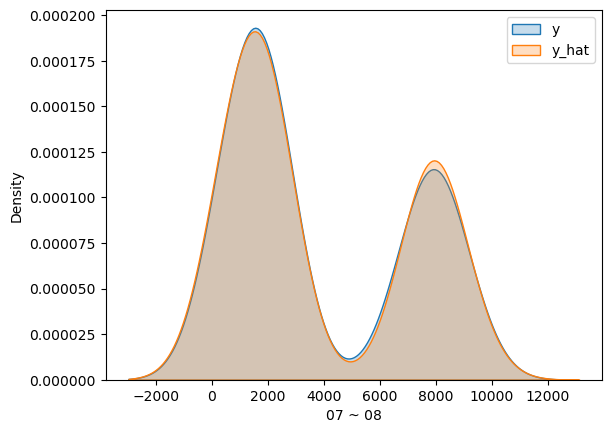

In [70]:
# 평균밀도
sns.kdeplot(x=y_test, fill=True, label='y')
sns.kdeplot(x=y_hat, fill=True, label='y_hat')
plt.legend()
plt.show()